<a href="https://colab.research.google.com/github/V-Rang/Machine-Learning-Practice/blob/main/Medical_Cost_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset.shape

(1338, 7)

In [ ]:
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
dataset.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [ ]:
dataset[dataset.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
dataset[dataset.duplicated(keep='last')]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
dataset[dataset.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
np.where(pd.isnull(dataset))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Three things to check:
1. Duplicates
2. Missing values
3. Typos

In [ ]:
#1. Duplicates
print(dataset[dataset.duplicated()],'\n') #last occurence of duplicate row
print(dataset[dataset.duplicated(keep='last')],'\n') #first occurence of duplicated row
print(dataset[dataset.duplicated(keep=False)],'\n') #all duplicate rows

#2. Missing values
print(np.where(pd.isnull(dataset)))

#. Typos
#to check if all values in children are integers - to keep track of errors like 1..422
cols_to_check = ['children']
for col in cols_to_check:
  for j in dataset[col]:
    try:
      int(j)
    except ValueError:
      print(j)

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631 

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631 

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631 

(array([], dtype=int64), array([], dtype=int64))


In [ ]:
#checking if all values in bmi are float
cols_to_check = ['bmi']
for col in cols_to_check:
  for j in dataset[col]:
    try:
      float(j)
    except ValueError:
      print(j)
      

In [ ]:
#####end of duplicates, missing values and typos

In [ ]:
dataset.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
target = dataset['charges']
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset = dataset.drop('charges',axis=1)
dataset.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [ ]:
dataset.shape

(1338, 6)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset,target,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [ ]:
X_train.head()

,age,sex,bmi,children,smoker,region
1075,32,female,29.590,1,no,southeast
126,19,female,28.300,0,yes,southwest
838,35,female,23.465,2,no,northeast
1191,41,female,21.755,1,no,northeast
917,45,male,22.895,0,yes,northeast


In [ ]:
# from sklearn.compose import make_column_transformer

# ct = make_column_transformer(
#     (MinMaxScaler(),['age','bmi','children']),
#     (OneHotEncoder(),['sex','smoker','region'])
# )
# ct.fit(X_train)
# X_train_normal = ct.transform(X_train)
# X_test_normal = ct.transform(X_test)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

# test_ct2 = ColumnTransformer(
#     (OneHotEncoder(),['sex']),
#     remainder='passthrough'
# )

test_ct2 = ColumnTransformer(transformers=[('one_hot_encoder',OneHotEncoder(),['sex','smoker','region']),
                                           ('minmax',MinMaxScaler(),['age','bmi','children'])],
                             remainder='passthrough'
                             )

# transformer = ColumnTransformer(transformers=[('one_hot_encoder', OneHotEncoder(), ['color'])], remainder='passthrough')

X_train_normal = test_ct2.fit_transform(X_train)
X_test_normal = test_ct2.transform(X_test)

In [ ]:
X_train_normal.shape

(1070, 11)

In [ ]:
pd.DataFrame(X_train).head()

,age,sex,bmi,children,smoker,region
1075,32,female,29.590,1,no,southeast
126,19,female,28.300,0,yes,southwest
838,35,female,23.465,2,no,northeast
1191,41,female,21.755,1,no,northeast
917,45,male,22.895,0,yes,northeast


In [ ]:
pd.DataFrame(X_train_normal).head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.304348,0.366694,0.2
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.021739,0.331988,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.369565,0.201910,0.4
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.500000,0.155905,0.2
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.586957,0.186575,0.0


In [ ]:
type(X_train_normal)

numpy.ndarray

In [ ]:
y_train.shape

(1070,)

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(20,input_shape=(11,)),
    tf.keras.layers.Dense(15),
    tf.keras.layers.Dense(1)
])

model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-1),
                loss=tf.keras.losses.mae,
                metrics=['accuracy'])

model_1.fit(X_train_normal,np.array(y_train),epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 10184.0381 - accuracy: 0.0000e+00
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 5954.6187 - accuracy: 0.0000e+00
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 3809.4841 - accuracy: 0.0000e+00
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 3810.4680 - accuracy: 0.0000e+00
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 3704.8560 - accuracy: 0.0000e+00
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 3648.0596 - accuracy: 0.0000e+00
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 3692.4629 - accuracy: 0.0000e+00
Epoch 8/100
34/34 [==============================] - 0s 10ms/step - loss: 3672.1479 - accuracy: 0.0000e+00
Epoch 9/100
34/34 [==============================] - 0s 9ms/step - loss: 3608.1287 - accuracy: 0.0000e+00
Epoch 10/100
34/34 [========================

In [ ]:
random_index = np.random.choice(len(X_test_normal),1)
random_sample = X_test_normal[random_index]
random_sample_output = np.array(y_test)[random_index[0]]

In [ ]:
model_1_preds = model_1.predict(X_test_normal)

9/9 [==============================] - 0s 2ms/step


In [ ]:
model_1_preds[0]

array([13127.3955], dtype=float32)

In [ ]:
test_pred = model_1.predict(random_sample)
test_pred,random_sample_output

1/1 [==============================] - 0s 26ms/step


(array([[11888.519]], dtype=float32), 11944.59435)

In [ ]:
model_1_preds.shape

(268, 1)

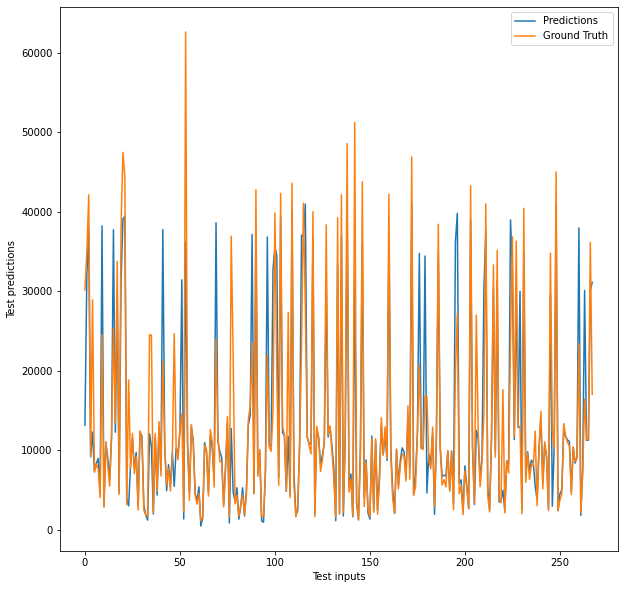

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(model_1_preds,label='Predictions')
plt.plot(np.array(y_test),label='Ground Truth')
plt.xlabel('Test inputs')
plt.ylabel('Test predictions')
plt.legend();

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


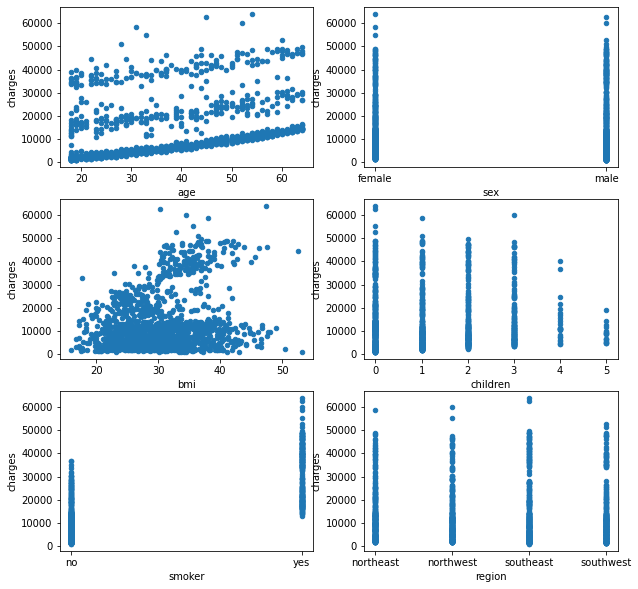

In [ ]:
#how variables effect insurance cost
dataset_org = pd.read_csv('insurance.csv')

dataset_org.head()

fig,ax = plt.subplots(3,2,figsize=(10,10))
dataset_org.sort_values(['age']).plot(ax=ax[0][0],x = 'age',y='charges',kind='scatter')
dataset_org.sort_values(['sex']).plot(ax=ax[0][1],x = 'sex',y='charges',kind='scatter')
dataset_org.sort_values(['bmi']).plot(ax=ax[1][0],x = 'bmi',y='charges',kind='scatter')
dataset_org.sort_values(['children']).plot(ax=ax[1][1],x = 'children',y='charges',kind='scatter')
dataset_org.sort_values(['smoker']).plot(ax=ax[2][0],x = 'smoker',y='charges',kind='scatter')
dataset_org.sort_values(['region']).plot(ax=ax[2][1],x = 'region',y='charges',kind='scatter');

In [ ]:
np.array(dataset_org['age'])[:10],sorted(np.array(dataset_org['age']))[:10],

(array([19, 18, 28, 33, 32, 31, 46, 37, 37, 60]),
 [18, 18, 18, 18, 18, 18, 18, 18, 18, 18])

In [ ]:
dataset_org.head(1)
dataset_org.sort_values('age')['smoker']

1248     no
482      no
492      no
525      no
529      no
       ... 
398      no
335      no
378      no
1265    yes
635      no
Name: smoker, Length: 1338, dtype: object

In [ ]:
smoker_val = []
for i in np.array(dataset_org.sort_values('age')['smoker']):
  if(i == 'yes'):
    smoker_val.append(1)
  else:
    smoker_val.append(0)

# smoker_val.append( 0 if for i in np.array(dataset_org.sort_values('age')['smoker']) == 'no' else 1 )

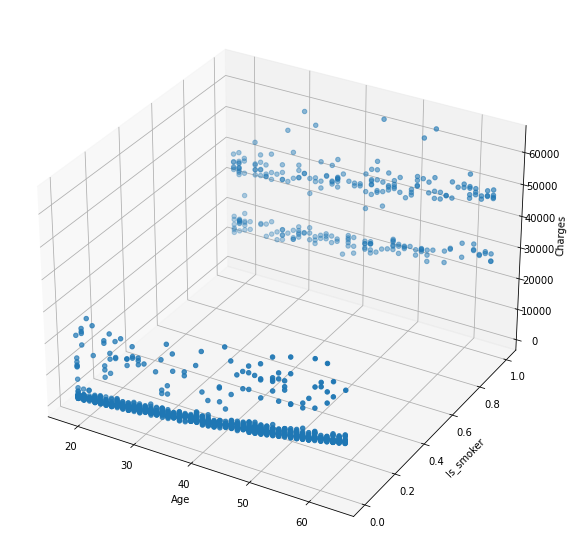

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(  sorted(np.array(dataset_org['age'])) ,smoker_val , np.array(dataset_org.sort_values('age')['charges']))

ax.set_xlabel('Age')
ax.set_ylabel('Is_smoker')
ax.set_zlabel('Charges')

plt.show()

In [ ]:
dataset_org.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset_org[dataset_org.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
#getting rid of duplicate entry
# data2 = dataset_org
# data2 = data2.drop(index = 195)
# data2[data2.duplicated()]
dataset_org = pd.read_csv('insurance.csv')
dataset_org[dataset_org.duplicated()] #581
dataset_org = dataset_org.drop(index = 581)

dataset_org[dataset_org.duplicated()] 

,age,sex,bmi,children,smoker,region,charges


In [ ]:
np.where(pd.isnull(dataset_org))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
dataset_org.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
dataset_org.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset_org['sex'].value_counts(),dataset_org['children'].value_counts(),dataset_org['smoker'].value_counts(),dataset_org['region'].value_counts()

(male      675
 female    662
 Name: sex, dtype: int64, 0    573
 1    324
 2    240
 3    157
 4     25
 5     18
 Name: children, dtype: int64, no     1063
 yes     274
 Name: smoker, dtype: int64, southeast    364
 southwest    325
 northwest    324
 northeast    324
 Name: region, dtype: int64)

In [ ]:
import plotnine

In [ ]:
from plotnine import ggplot
from plotnine import geom_density
from plotnine import ggtitle

In [ ]:
dataset_org['charges'].value_counts()

16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [ ]:
from plotnine.ggplot import *

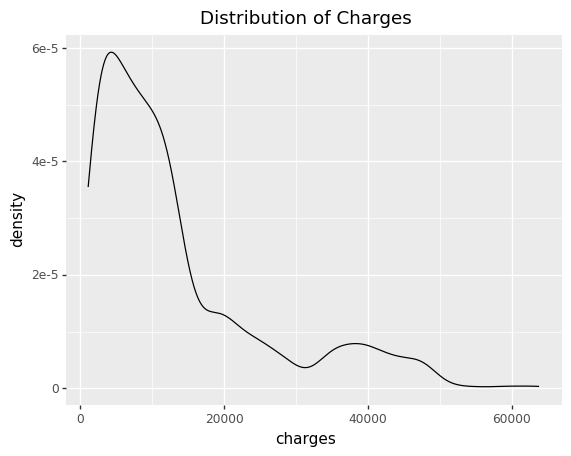

<ggplot: (8781908834317)>

In [ ]:
ggplot(dataset_org, aes(x='charges')) + \
  geom_density(alpha=0.5) + \
  ggtitle('Distribution of Charges')
# (
# ggplot(dataset_org, aes(x='charges')) + 
#   geom_density(alpha=0.5) + 
#   ggtitle('Distribution of Charges')
# )

In [ ]:
dataset_org.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset_org['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

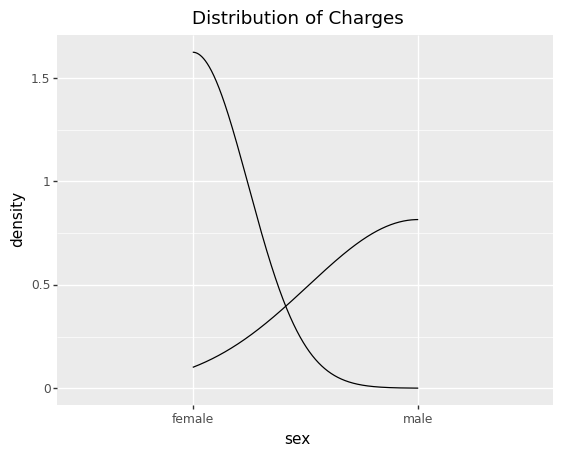

<ggplot: (8781909686206)>

In [ ]:
(
ggplot(dataset_org, aes(x='sex')) + 
  geom_density(alpha=0.1) + 
  ggtitle('Distribution of Charges')
)

In [ ]:
np.array(dataset_org['sex'])

array(['female', 'male', 'male', ..., 'female', 'female', 'female'],
      dtype=object)

In [ ]:
x = dict(dataset_org['sex'].value_counts())
print(x)

{'male': 675, 'female': 662}


In [ ]:
dict(dataset_org['sex'].value_counts())

{'male': 675, 'female': 662}

<AxesSubplot:ylabel='Density'>

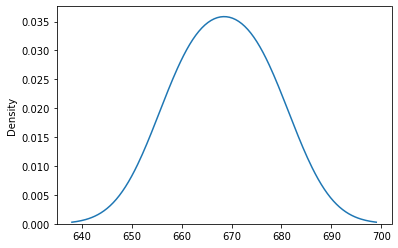

In [ ]:
import seaborn as sns
# sns.set_style('whitegrid')
gender_count = dict()
sns.kdeplot(dict(dataset_org['sex'].value_counts()))

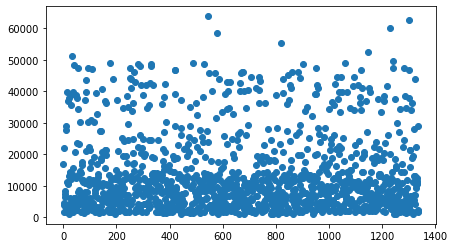

In [ ]:
plt.figure(figsize=(7,4))
plt.scatter(np.arange(len(dataset_org['charges'])),dataset_org['charges'])


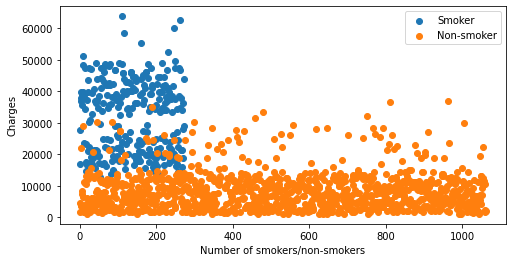

In [ ]:
smoker_charges,non_smoker_charges = [],[]

for i in range(len(dataset_org)):
  patient = dataset_org.iloc[i]
  if patient['smoker'] == 'yes':
    smoker_charges.append(patient['charges'])
  else:
    non_smoker_charges.append(patient['charges'])


plt.figure(figsize=(8,4))
plt.scatter(np.arange(len(smoker_charges)),smoker_charges,label='Smoker')
plt.scatter(np.arange(len(non_smoker_charges)),non_smoker_charges,label='Non-smoker')
plt.xlabel('Number of smokers/non-smokers')
plt.ylabel('Charges')
plt.legend();
    

# print(dataset_org.iloc[[0]]['smoker'] == 'yes')
# print(dataset_org.loc[[0]])



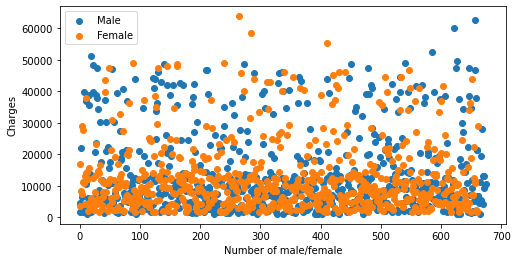

In [ ]:
male_charges,female_charges = [],[]

for i in range(len(dataset_org)):
  patient = dataset_org.iloc[i]
  if patient['sex'] == 'male':
    male_charges.append(patient['charges'])
  else:
    female_charges.append(patient['charges'])


plt.figure(figsize=(8,4))
plt.scatter(np.arange(len(male_charges)),male_charges,label='Male')
plt.scatter(np.arange(len(female_charges)),female_charges,label='Female')
plt.xlabel('Number of male/female')
plt.ylabel('Charges')
plt.legend();
    

In [ ]:
dataset_org['charges']


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [ ]:
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

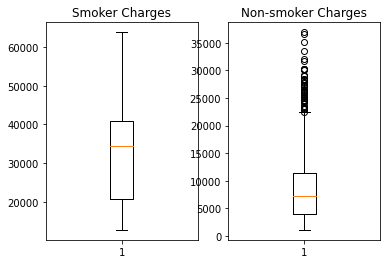

In [ ]:
fig,ax = plt.subplots(1,2)
ax[0].boxplot(smoker_charges)
ax[0].set_title('Smoker Charges')
ax[1].boxplot(non_smoker_charges);
ax[1].set_title('Non-smoker Charges');

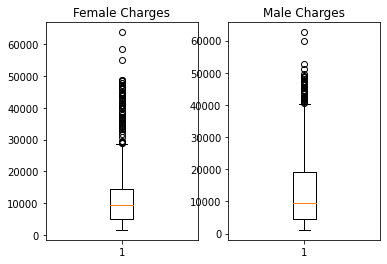

In [ ]:
fig,ax = plt.subplots(1,2)
ax[0].boxplot(female_charges)
ax[0].set_title('Female Charges')
ax[1].boxplot(male_charges);
ax[1].set_title('Male Charges');

In [ ]:
#by region
dataset_org['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

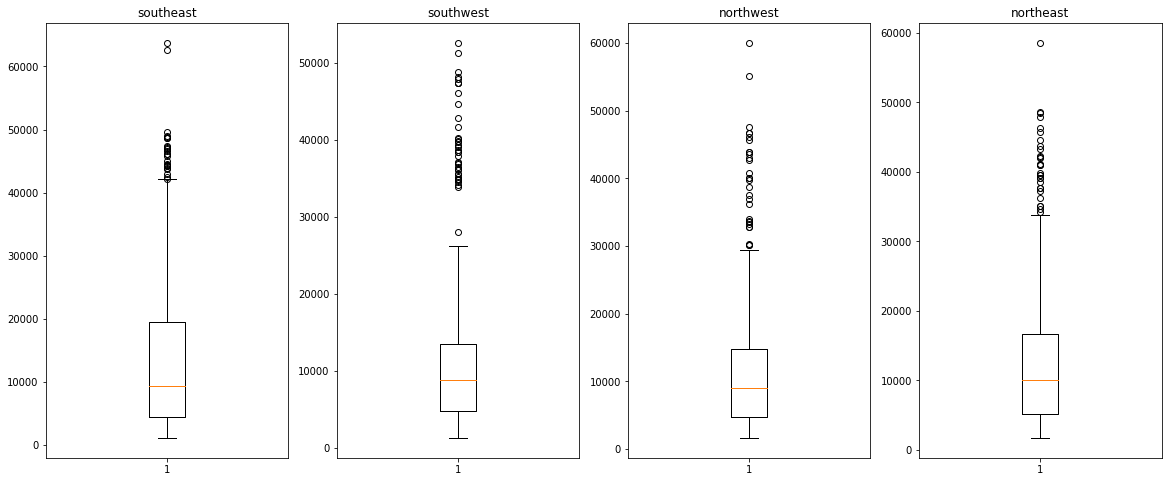

In [ ]:
regions = dict(dataset_org['region'].value_counts())
region_prices = dict()
for region in regions:
  region_prices[region] = []

for i in range(len(dataset_org)):
  patient = dataset_org.iloc[i]
  region_prices[patient['region']].append(patient['charges'])

n = len(regions)

fig,ax = plt.subplots(1,n,figsize=(20,8))
i = 0
for label in region_prices.keys():
  ax[i].boxplot(region_prices[label])
  ax[i].set_title(f'{label}')
  i += 1

In [ ]:
#per children
dataset_org['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

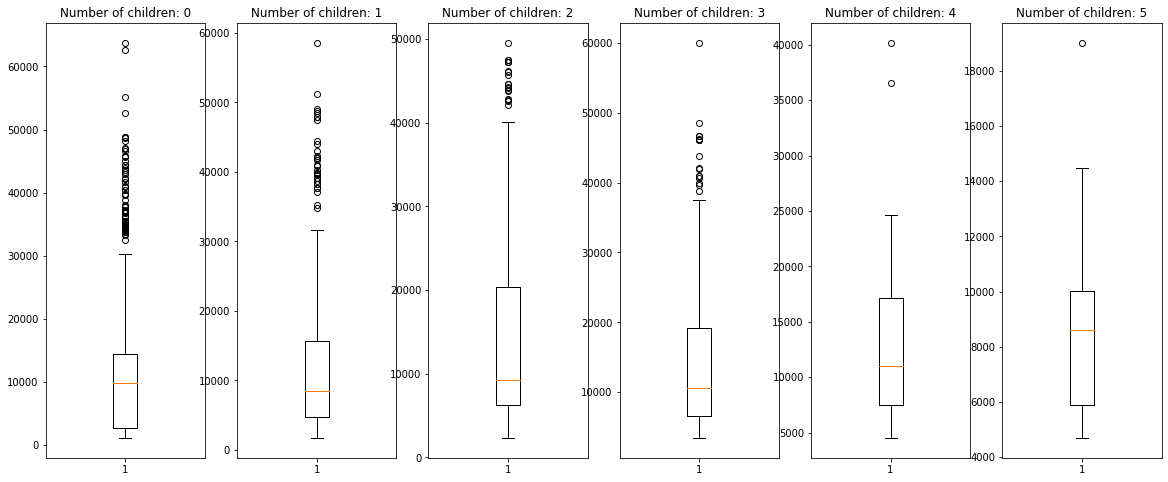

In [ ]:
children = dict(dataset_org['children'].value_counts())
children_charges = dict()
for child_count in children:
  children_charges[child_count] = []

for i in range(len(dataset_org)):
  patient = dataset_org.iloc[i]
  children_charges[patient['children']].append(patient['charges'])

n = len(children)

fig,ax = plt.subplots(1,n,figsize=(20,8))
i = 0
for label in children_charges.keys():
  ax[i].boxplot(children_charges[label])
  ax[i].set_title(f'Number of children: {label}')
  i += 1

In [ ]:
dataset_org.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


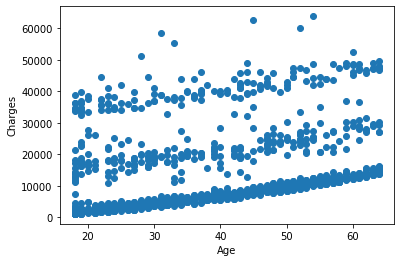

In [ ]:
plt.scatter(dataset_org['age'],dataset_org['charges'])
plt.ylabel('Charges')
plt.xlabel('Age');

In [ ]:
dataset_org.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
type(dataset_org.iloc[0]['smoker'])

str

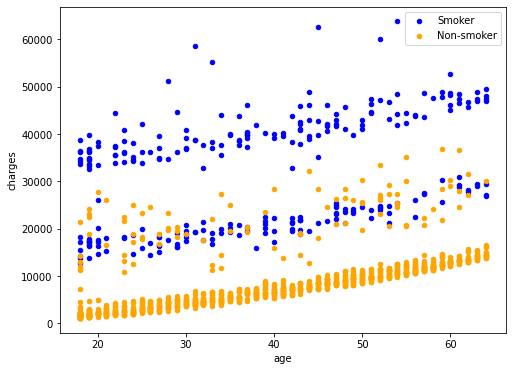

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
dataset_org[dataset_org['smoker'] == 'yes'].plot(x='age',y='charges',kind='scatter',color='b',ax=ax,label='Smoker')
dataset_org[dataset_org['smoker'] == 'no'].plot(x='age',y='charges',kind='scatter',color='orange',ax=ax,label='Non-smoker')
plt.legend();

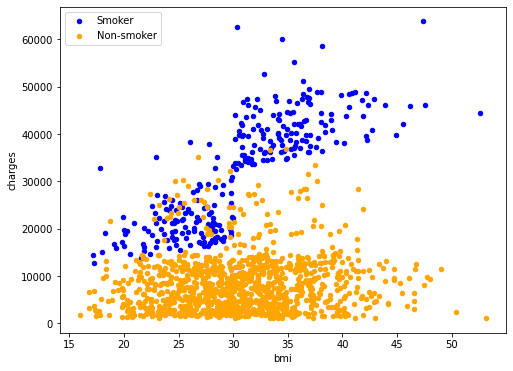

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
dataset_org[dataset_org['smoker'] == 'yes'].plot(x='bmi',y='charges',kind='scatter',color='b',ax=ax,label='Smoker')
dataset_org[dataset_org['smoker'] == 'no'].plot(x='bmi',y='charges',kind='scatter',color='orange',ax=ax,label='Non-smoker')
plt.legend();

In [ ]:
dataset_org['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

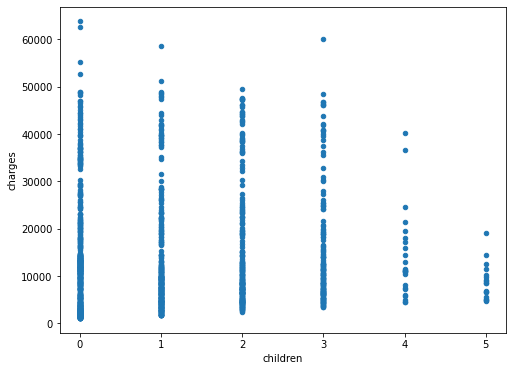

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
for i in range(len(dataset_org['children'].value_counts())):
  dataset_org[dataset_org['children']==i].plot(x='children',y='charges',kind='scatter',ax=ax)

In [ ]:
dataset_org['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [ ]:
dataset_org['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
x = dict(dataset_org['region'].value_counts())
x

{'southeast': 364, 'southwest': 325, 'northwest': 324, 'northeast': 324}

In [ ]:
dataset_org['region'].unique()[0]

'southwest'

In [ ]:
dataset_org[dataset_org['region']=='southwest']

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92400
12,23,male,34.4,0,no,southwest,1826.84300
15,19,male,24.6,1,no,southwest,1837.23700
18,56,male,40.3,0,no,southwest,10602.38500
19,30,male,35.3,0,yes,southwest,36837.46700
...,...,...,...,...,...,...,...
1316,19,female,20.6,0,no,southwest,1731.67700
1329,52,male,38.6,2,no,southwest,10325.20600
1331,23,female,33.4,0,no,southwest,10795.93733
1332,52,female,44.7,3,no,southwest,11411.68500


In [ ]:
dataset_org.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
len(pd.DataFrame([0]*len(dataset_org[dataset_org['region']=='southwest'])   )),len(dataset_org[dataset_org['region']=='southwest']['charges'])

(325, 325)

In [ ]:
dataset_org.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset_org = pd.read_csv('insurance.csv')

In [ ]:
#correlations
d2 = dataset_org.copy()
d2.head()
d2.loc[d2['sex'] == 'male','sex'] = 1
d2.loc[d2['sex'] == 'female','sex'] = 0

d2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer([
#     ('one_hot_encoder',OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region']),
# ])

# d2 = pd.DataFrame(

In [ ]:
d2 = pd.get_dummies(dataset_org)

In [ ]:
d2.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
dataset_org.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    [('onehotencoder',OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])]
)

ct.fit(dataset_org)
d3 = ct.transform(dataset_org)

In [ ]:
type(d3)

numpy.ndarray

In [ ]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal[:5]

array([[1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1.]])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
ct2 = ColumnTransformer( 
    [( 'one_hot_encoder',OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])]
)

X = dataset_org.drop('charges',axis=1)
y = dataset_org['charges']

# ct.fit(np.array(dataset_org))
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.2,random_state=12)
ct2.fit(X_train2)
# len(X_train),len(X_test),len(y_train),len(y_test)
X_train_normal2 = ct.transform(X_train2)
X_test_normal2 = ct.transform(X_test2)
X_train_normal2[:5]

array([[1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1.]])

In [ ]:
X_train_normal == X_train_normal2

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
d2.head()

,0,1,2,3,4,5,6,7
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
d2.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
dataset_org.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset_org.loc[0,'sex']

'female'

In [ ]:
dataset_org = pd.read_csv('insurance.csv')
dataset_org.head()
dataset_org['sex'] == 'male','sex'

(0       False
 1        True
 2        True
 3        True
 4        True
         ...  
 1333     True
 1334    False
 1335    False
 1336    False
 1337    False
 Name: sex, Length: 1338, dtype: bool, 'sex')

In [ ]:
dataset_org.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.python import train
X = dataset_org.drop('charges',axis=1)
y = dataset_org['charges']

ct = ColumnTransformer(
    [('onehotencoder',OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region']),
     ('Minmaxscalar',MinMaxScaler(),['age','bmi','children'])]
)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
pd.DataFrame(X_train_normal)

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.065217,0.148749,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.413043,0.393122,0.6
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.869565,0.455333,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.086957,0.177967,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.652174,0.431008,0.2
...,...,...,...,...,...,...,...,...,...,...,...
1065,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.913043,0.332308,0.2
1066,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.652174,0.337341,0.2
1067,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.934783,0.743324,0.0
1068,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.717391,0.251223,0.2


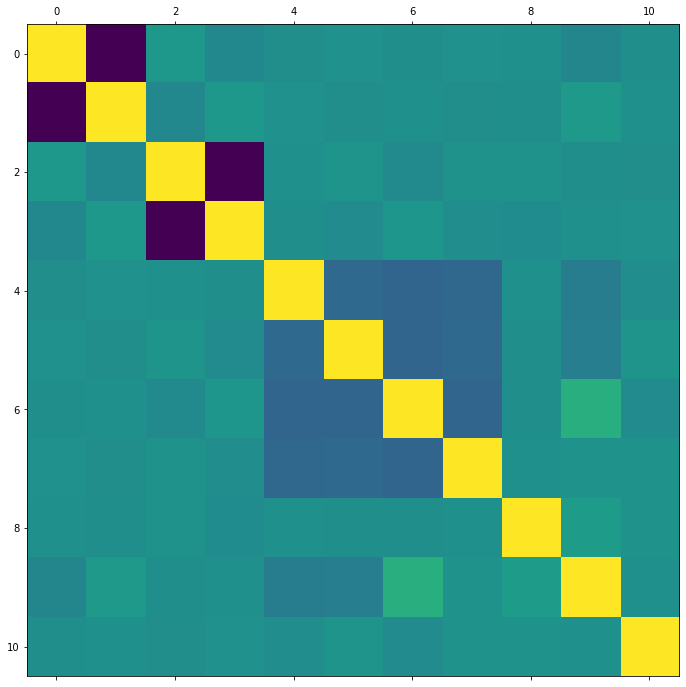

In [ ]:
import seaborn as sns
fig,ax = plt.subplots(1,1,figsize=(12,12))
ax.matshow(pd.DataFrame(X_train_normal).corr())
# corr = pd.DataFrame(X_train_normal).corr()
# sns.heatmap(corr,
#             cmap = sns.diverging_palette(220,10,as_cmap=True),
#             vmin=-1.0,vmax=1.0,
#             square=True,ax=ax)

In [ ]:
dataset_org.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset_org.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
X_train_normal.shape

(1070, 11)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[11,]),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-1),
              metrics=['accuracy'])

model_history = model.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 10604.9131 - accuracy: 0.0000e+00
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 6444.0552 - accuracy: 0.0000e+00
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 3682.9512 - accuracy: 0.0000e+00
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 3555.4954 - accuracy: 0.0000e+00
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 3469.8918 - accuracy: 0.0000e+00
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 3488.1877 - accuracy: 0.0000e+00
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 3452.2000 - accuracy: 0.0000e+00
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 3478.0256 - accuracy: 0.0000e+00
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 3435.9482 - accuracy: 0.0000e+00
Epoch 10/100
34/34 [=========================

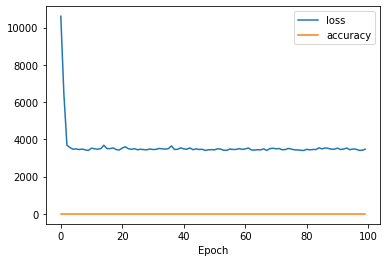

In [ ]:
# plt.plot(model_history.history['loss'])
# plt.xlabel('Epochs')
# plt.ylabel('Loss');

pd.DataFrame(model_history.history).plot()
plt.xlabel('Epoch');

In [ ]:
model_history_2 = model.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 4ms/step - loss: 3426.3665 - accuracy: 0.0000e+00
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 3463.3728 - accuracy: 0.0000e+00
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 3489.9912 - accuracy: 0.0000e+00
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 3470.2319 - accuracy: 0.0000e+00
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 3460.8862 - accuracy: 0.0000e+00
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 3441.3997 - accuracy: 0.0000e+00
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 3431.0938 - accuracy: 0.0000e+00
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 3491.4006 - accuracy: 0.0000e+00
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 3491.7729 - accuracy: 0.0000e+00
Epoch 10/100
34/34 [==========================

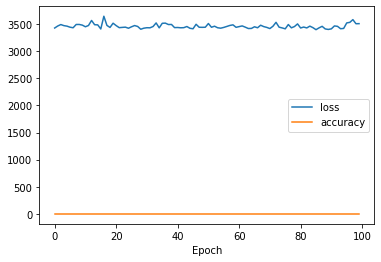

In [ ]:
pd.DataFrame(model_history_2.history).plot()
plt.xlabel('Epoch');